In [4]:
# import modules 
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.metrics import r2_score

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [8]:
#load the digits dataset: digits
digits = datasets.load_digits()


#create feature and target arrays
X = digits.data
y = digits.target

#split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
        test_size = 0.2)


In [9]:
#define the range of k values to try
k_values = range(1, 8)

# initialize empty lists to store accuracy scores for training and testing sets
train_accuracy_scores = []
test_accuracy_scores = []

# loop over different k values and train a k-NN classifier for each value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_scores.append(train_accuracy)
    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracy_scores.append(test_accuracy)
    
    

/Users/alexia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/alexia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

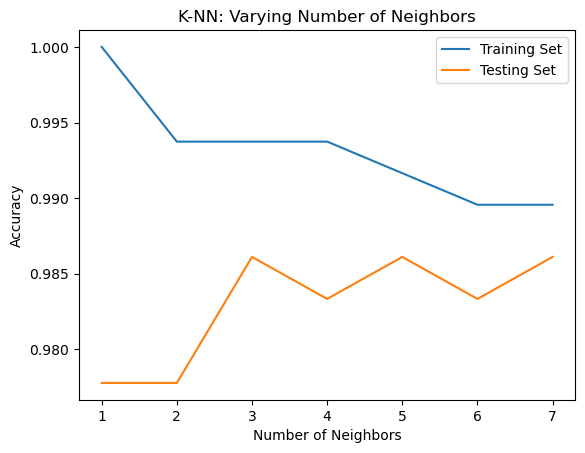

In [10]:
# plot the accuracy scores by k values for both training and testing sets
plt.plot(k_values, train_accuracy_scores, label='Training Set')
plt.plot(k_values, test_accuracy_scores, label='Testing Set')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('K-NN: Varying Number of Neighbors')
plt.legend()
plt.show()



# conclusion: 
The higher the accuracy, the better. 

Training set has the best accuracy when the number of neighbors is 1.
However, 

Training set has a negative correlation with number of neighbors. 
the higher the number of neighbors, the lower the accuracy. 

Testing set remains between the range of 0.99 - 0.975, so even though it has a positive correlation (the accuracy increases the more number of neighbors are used)

therefore training set is best.



# Support Vector Machine

Implement SVM classifier for MNIST dataset.

In [11]:
# normalize the data
X_train = X_train / 16.0
X_test = X_test / 16.0

In [12]:
# train an SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
# make predictions on the testing set
y_pred = svm.predict(X_test)


In [14]:
# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.975


Compute and compare the accuracy scores for at least 3 different kernels by using
metrics.classification_report.

In [15]:
# train SVM classifiers with different kernels
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

In [16]:
# make predictions on the testing set
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)


In [17]:
# print classification reports for each kernel
print('Linear Kernel:')
print(classification_report(y_test, y_pred_linear))

print('Polynomial Kernel:')
print(classification_report(y_test, y_pred_poly))

print('RBF Kernel:')
print(classification_report(y_test, y_pred_rbf))

Linear Kernel:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.90      1.00      0.95        37
           2       1.00      0.98      0.99        41
           3       1.00      0.98      0.99        41
           4       0.97      1.00      0.99        35
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        40
           7       1.00      0.97      0.99        37
           8       0.86      0.90      0.88        21
           9       0.97      0.91      0.94        32

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360

Polynomial Kernel:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.97      1.00      0.99        37
           2       0.98      1.00      0.99 

Make conclusion about which kernel should be used in this case

conclusion:

all three kernals acheive high accuracy scores on the mnist digit dataset.
    
linear kernal has highest precision, and F1 score for most classes, 
but lower recall for classes such as 5 and 9.
    
polynomial kernal has high precision and recall for most classes, but lower precision and recall for classes 2 and 5
    
the RBF kernel has high precision and recall for most classes, but lower precision for classes 2,4 and 9
    
If high precision is important, then linear kernal is the best choise.
    
If high recall is more important, than polynomail or RBF kernals are better choises. 

# 3. Naïve Bayes 

task :Compute the accuracy scores and plot the confusion matrix of the same dataset using
Naïve Bayes classifier.

In [18]:
# train a Naïve Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [19]:
# make predictions on the testing set
y_pred = nb.predict(X_test)

In [20]:
# compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score:', accuracy)

Accuracy score: 0.8611111111111112


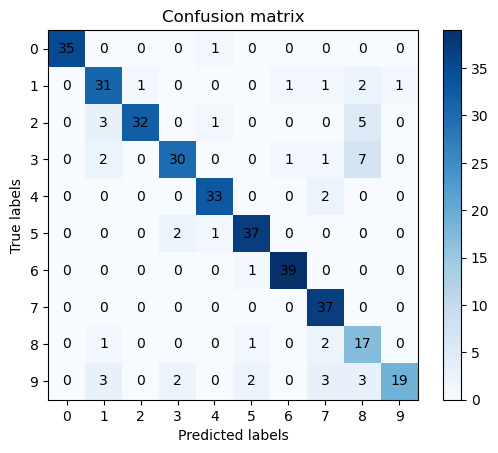

In [21]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)

# add data values to the confusion matrix
for i in range(10):
    for j in range(10):
        plt.text(j, i, cm[i, j], ha='center', va='center')
        
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.colorbar()
plt.show()

In [22]:
#should I go with or without data labels? 

Compare the accuracy of different classifiers in the same plot

In [23]:
# train classifiers
svc = SVC(kernel='linear', C=1, gamma='auto')
svc.fit(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
# make predictions on the testing set
svc_pred = svc.predict(X_test)
nb_pred = nb.predict(X_test)
knn_pred = knn.predict(X_test)

/Users/alexia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
# compute the accuracy scores
svc_accuracy = accuracy_score(y_test, svc_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

In [26]:
# plot the accuracy scores
classifiers = ['SVM', 'Naïve Bayes', 'KNN']
accuracies = [svc_accuracy, nb_accuracy, knn_accuracy]

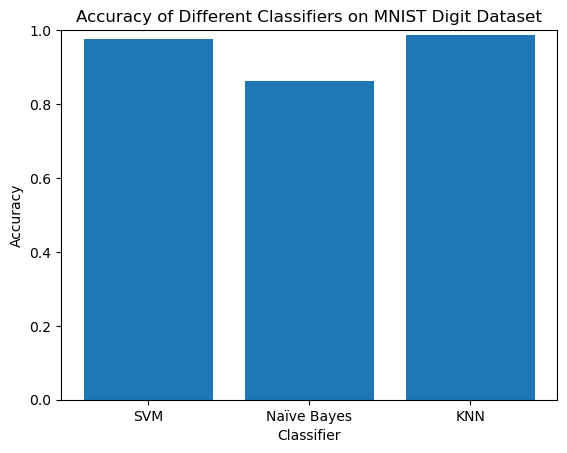

In [27]:
plt.bar(classifiers, accuracies)
plt.ylim([0, 1])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers on MNIST Digit Dataset')
plt.show()

conclusion: 
    
SVM has the highest accuracy. 

KNN has second highest, 

Naive Bayes classifier least accurate out of the three

# 1. Linear Regression

Use seaborn to visualize the data of Gapminder like following image:
    
tip : seaborn is just  'import seaborn as sns'

In [28]:
gp = pd.read_csv("gapminder.csv")

In [29]:
gp.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [30]:
gp.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


#does the 'life' column count as life expectancy? I think it does,
comparring to example

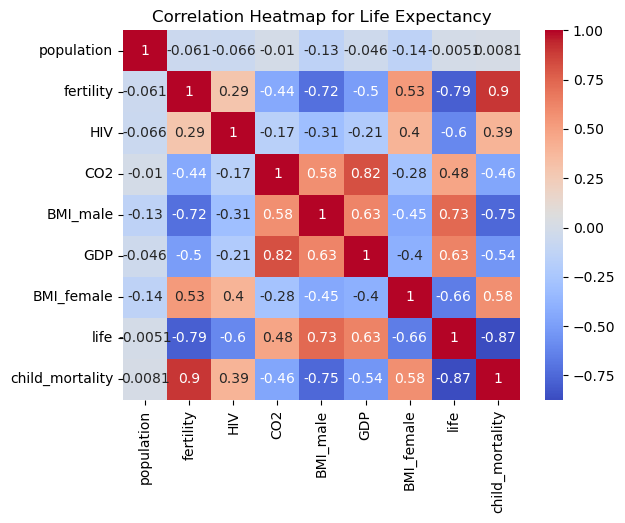

In [45]:
sns.heatmap(gp.corr(),cmap='coolwarm',annot=True)

# set the title
plt.title("Correlation Heatmap for Life Expectancy")

# display the plot
plt.show()


<AxesSubplot:>

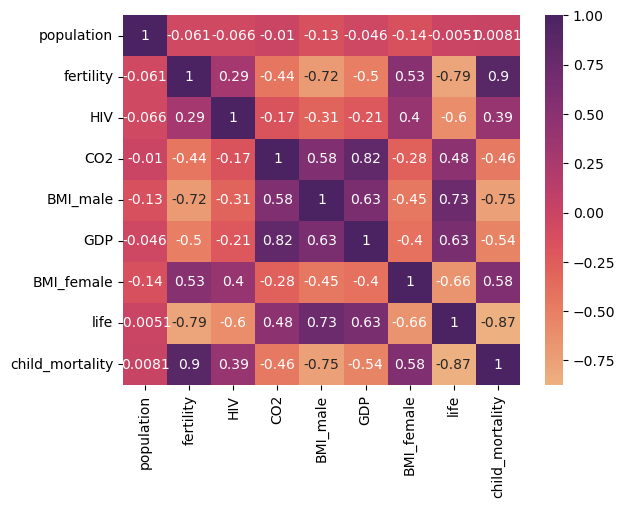

In [46]:
sns.heatmap(gp.corr(),cmap='flare',annot=True)

<AxesSubplot:>

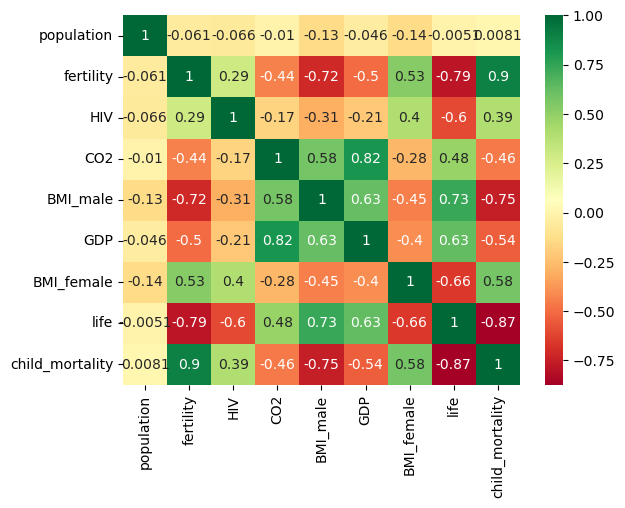

In [47]:
sns.heatmap(gp.corr(),cmap='RdYlGn',annot=True)

Apply linear regression with the 'fertility' feature to predict life expectancy. 

0.6192442167740035


/var/folders/h0/8_wby_212cs0h3_gmjklt61c0000gn/T/ipykernel_39192/291962351.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression.fit(x[:, None], y)
/var/folders/h0/8_wby_212cs0h3_gmjklt61c0000gn/T/ipykernel_39192/291962351.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression.score(x[:, None], y))
/var/folders/h0/8_wby_212cs0h3_gmjklt61c0000gn/T/ipykernel_39192/291962351.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fig, ax = plt.plot(x, y,  'bo', x, regression.predict(x[:, None]), '-k')


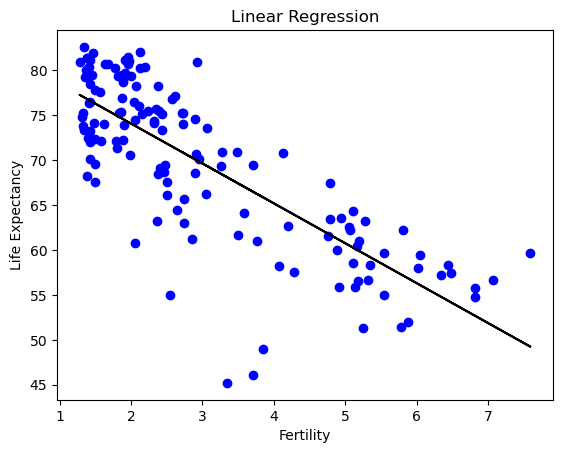

In [48]:
x = gp['fertility']
y = gp['life']

regression = LinearRegression()
regression.fit(x[:, None], y)
print(regression.score(x[:, None], y))

fig, ax = plt.plot(x, y,  'bo', x, regression.predict(x[:, None]), '-k')

plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.title('Linear Regression')
plt.show()


conclusion: Negative correlation between Fertility and Life Expecatancy 

The greater the fertility is, the lower the life expectancy is.

This correlates with youthful populates that reproduce but die out quicker (Africa)
While aging populations (Japan, Italy, Russia) are less likely to reproduce, hence explaining the lower fertility rate

Apply linear regression with the all features to predict life expectancy. Compare the
model score when using all features to one feature in previous step. 

In [36]:
x = gp[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 
        'BMI_female', 'child_mortality']]
y = gp['life']

multilinear_regression = LinearRegression()
multilinear_regression.fit(x, y)
print(multilinear_regression.score(x, y))

# fig, ax = plt.plot(x, y, 'bo', x, regression.predict(x[:, None]), '-k')



0.8978171883856773


All features against life expectancy mulitliner regression: 0.8978171883856773 

Life against fertility linear slope value :-4.443878989782841 
    
Since the model score of life against fertility is negative, it means that if fertility value increases, the life variable decreases. 
    
All features against life expectancy has a high positive correlation of 0.90, meaning that if one variable increases, the other's increase also.     
    

Apply 5-fold cross-validation (for both 2 above steps) and compare your model score
accuracy. Hint: from sklearn.model_selection import cross_val_score.

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
x = gp['fertility']
y = gp['life']
regression = LinearRegression()
cross_val_score(regression, x[:, None], y, cv=5)

/var/folders/h0/8_wby_212cs0h3_gmjklt61c0000gn/T/ipykernel_39192/55244285.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cross_val_score(regression, x[:, None], y, cv=5)


array([0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561])

In [39]:
x = gp[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 
        'BMI_female', 'child_mortality']]
y = gp['life']
multilinear_regression = LinearRegression()
cross_val_score(multilinear_regression, x, y, cv=5)

array([0.81720569, 0.82917058, 0.90214134, 0.80633989, 0.94495637])

accuracy values 
fertility against life: [0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561]

all features against life: [0.81720569, 0.82917058, 0.90214134, 0.80633989, 0.94495637]

The accuracy scores for the multilinear regression has a higher value than the fertility against life. meaning results are more accurate when comparing all features against life. but the accuracy results are less accurate when comparing fertility against life. 

# 2. Logistic Regression

Load the ‘creditcard.csv’ file into dataframe. The attribute ‘Class’ is marked for fraud
transactions (Class = 1).

In [40]:
cd = pd.read_csv("creditcard.csv")
cd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Compare the relation between Class and Amount. Conclusion?

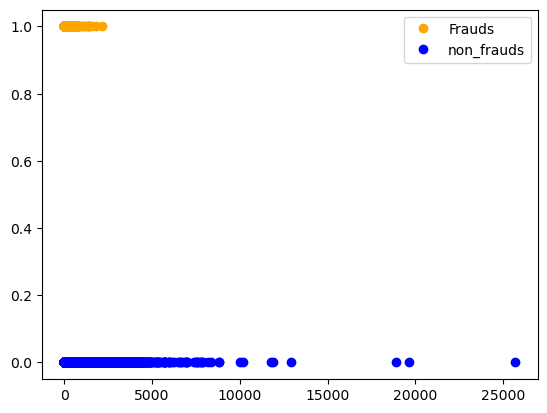

In [41]:
frauds = cd.loc[cd['Class'] ==1]
non_frauds = cd.loc[cd['Class'] == 0]
plt.plot(frauds.Amount, frauds.Class, 'o', color="orange", label="Frauds")
plt.plot(non_frauds.Amount, non_frauds.Class, 'o', color="blue", label="non_frauds")
plt.legend()


Conclusion:

frauds range: 0-5000.
non_frauds: 0-30,000

Frauds occur much less than non_frauds, meaning majority of credit card owners do not commit frauds. 


Use Logistic Regression to predict the fraud transactions and plot the confusion matrix
of the model.

[[284156    159]
 [   150    342]]


/Users/alexia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

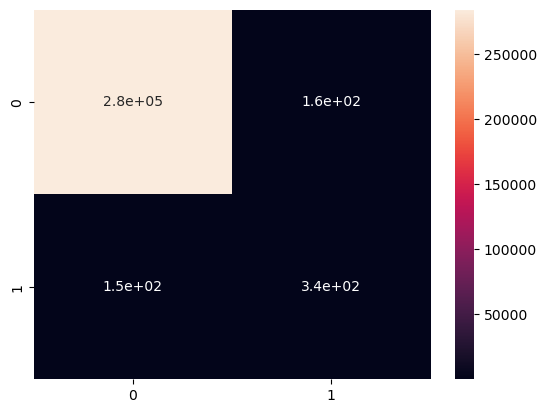

In [42]:
# Logistic Regression

X= cd.drop("Class", axis=1)
y= cd.Class

log_regression = LogisticRegression()
log_regression.fit(X, y)
y_pred = log_regression.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True)